In [3]:
import pandas as pd
df = pd.read_csv("../data/processed/final_ml_ready.csv")

In [4]:
df["delivered_late"].value_counts()

delivered_late
0    91614
1     7827
Name: count, dtype: int64

In [5]:
late_rate = df["delivered_late"].mean() * 100
late_rate

np.float64(7.870998883760219)

In [6]:
val = df["delivered_late"].value_counts().get(1,0)/len(df["delivered_late"]) * 100
val

np.float64(7.870998883760219)

In [7]:
df["review_score"].value_counts(normalize=True).round(3).to_dict()

{5.0: 0.573, 4.0: 0.192, 1.0: 0.114, 3.0: 0.082, 2.0: 0.032, 0.0: 0.008}

In [8]:
df.columns

Index(['order_id', 'customer_id', 'order_status',
       'customer_seller_distance_km', 'is_delivered', 'delivery_time_days',
       'is_late', 'shipping_window_days', 'promised_delivery_days',
       'approval_delay_days', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix_x',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'is_category_missing', 'product_volume_cm3', 'is_large_product',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix_y', 'payment_value',
       'payment_installments', 'review_score', 'has_review', 'num_items',
       'total_price', 'log_distance_seller_customer', 'delivered_late'],
      dtype='object')

In [9]:
tr_df = pd.read_csv("../data/processed/translation_clean.csv")
tr_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
top_categories = df["product_category_name"].value_counts().head(5).index.to_list()
top_categories

['cama_mesa_banho',
 'beleza_saude',
 'esporte_lazer',
 'informatica_acessorios',
 'moveis_decoracao']

In [11]:
top_dict = df["product_category_name"].value_counts().head(5).to_dict()

In [12]:
translation_dict = dict(zip(
    tr_df["product_category_name"],
    tr_df["product_category_name_english"]
))

# Step 3: Translate keys
translated_top_dict = {
    translation_dict[k]: v for k, v in top_dict.items() if k in translation_dict
}

translated_top_dict

{'bed_bath_table': 9311,
 'health_beauty': 8796,
 'sports_leisure': 7681,
 'computers_accessories': 6660,
 'furniture_decor': 6355}

In [13]:

l = tr_df[tr_df["product_category_name"].isin(top_categories)]["product_category_name_english"].to_dict()
l

{0: 'health_beauty',
 1: 'computers_accessories',
 3: 'bed_bath_table',
 4: 'furniture_decor',
 5: 'sports_leisure'}

In [14]:
insights = {}

In [15]:
if "product_category_name" in df.columns:
        top_categories = df["product_category_name"].value_counts().head(5).to_dict()
        translation_dict = dict(zip(
            tr_df["product_category_name"],
            tr_df["product_category_name_english"]
        ))

        # Step 3: Translate keys
        translated_top_dict = {
            translation_dict[k]: v for k, v in top_categories.items() if k in translation_dict
        }

        insights["top_categories"] = translated_top_dict

In [16]:
insights["top_categories"]

{'bed_bath_table': 9311,
 'health_beauty': 8796,
 'sports_leisure': 7681,
 'computers_accessories': 6660,
 'furniture_decor': 6355}

In [17]:
numeric_cols = df.select_dtypes(include="number")
numeric_cols.corr()["delivered_late"].sort_values(ascending=False).round(3).head(10).to_dict()

{'is_late': 1.0,
 'delivered_late': 1.0,
 'delivery_time_days': 0.585,
 'has_review': 0.084,
 'customer_seller_distance_km': 0.068,
 'log_distance_seller_customer': 0.053,
 'is_delivered': 0.051,
 'freight_value': 0.04,
 'customer_zip_code_prefix': 0.024,
 'geolocation_zip_code_prefix_x': 0.024}

In [18]:
avg_time = df["delivery_time_days"].mean()
avg_time

np.float64(11.703663478846753)

# Plots using matplotlib and seaborn

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
df = pd.read_csv("../data/processed/final_ml_ready.csv")

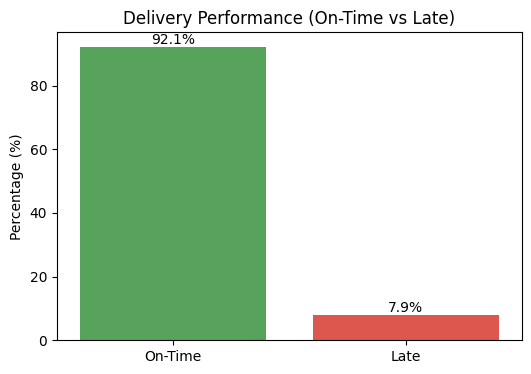

In [21]:
late_rate = df["delivered_late"].mean() * 100
values = [100 - late_rate, late_rate]
labels = ["On-Time", "Late"]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=values,hue=labels, palette=["#4CAF50", "#F44336"])
plt.ylabel("Percentage (%)")
plt.title("Delivery Performance (On-Time vs Late)")

for i, val in enumerate(values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center')

plt.show()


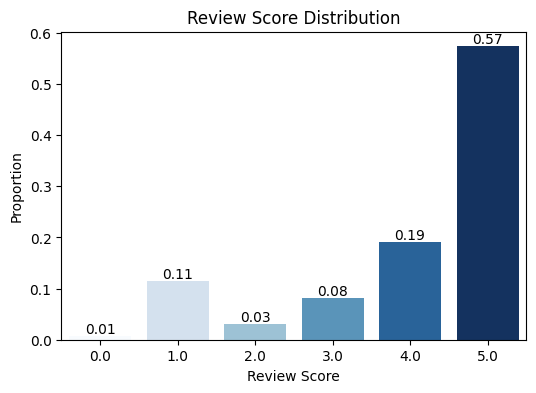

In [22]:
review_counts = df["review_score"].value_counts(normalize=True).sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(
    x=review_counts.index.to_list(),  # avoids FutureWarning
    y=review_counts.values.tolist(),  # avoids FutureWarning
    hue=review_counts.index.to_list(),  # required for palette
    palette="Blues",
    legend=False
)

# Add value labels
for i, v in enumerate(review_counts.values):
    plt.text(i, v + 0.005, f"{v:.2f}", ha="center", fontsize=10)

plt.xlabel("Review Score")
plt.ylabel("Proportion")
plt.title("Review Score Distribution")
plt.show()

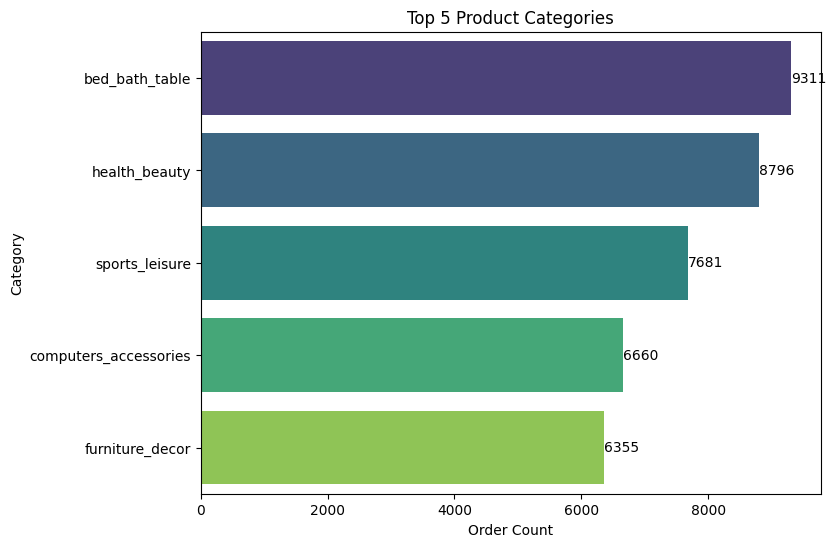

In [23]:
top_categories = df["product_category_name"].value_counts().head(5).to_dict()
tr_df = pd.read_csv("../data/processed/translation_clean.csv")

translation_dict = dict(zip(
    tr_df["product_category_name"],
    tr_df["product_category_name_english"]
))

translated_top_dict = {
    translation_dict[k]: v for k, v in top_categories.items() if k in translation_dict
}

# Plot using translated names
plt.figure(figsize=(8, 6))
sns.barplot(
    y=list(translated_top_dict.keys()),
    x=list(translated_top_dict.values()),
    hue=list(translated_top_dict.keys()),
    palette="viridis",
    legend=False
)

# Add value labels
for i, v in enumerate(translated_top_dict.values()):
    plt.text(v + 0.1, i, str(v), va="center", fontsize=10)

plt.xlabel("Order Count")
plt.ylabel("Category")
plt.title("Top 5 Product Categories")
plt.show()


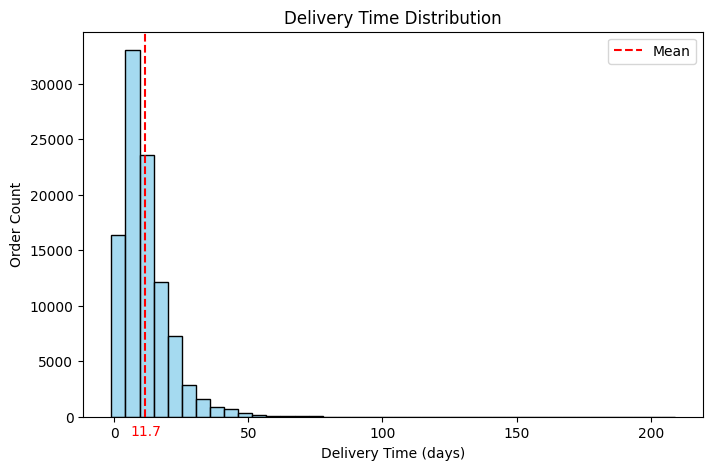

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df["delivery_time_days"].dropna(), bins=40, kde=False, color="skyblue")
plt.axvline(df["delivery_time_days"].mean(), color="red", linestyle="--", label="Mean")
mean_val = df["delivery_time_days"].mean()
# Add mean label on x-axis
plt.text(mean_val, -plt.ylim()[1]*0.02, f"{mean_val:.1f}", color="red", ha="center", va="top", fontsize=10)
plt.xlabel("Delivery Time (days)")
plt.ylabel("Order Count")
plt.title("Delivery Time Distribution")
plt.legend()
plt.show()

In [25]:
df.columns

Index(['order_id', 'customer_id', 'order_status',
       'customer_seller_distance_km', 'is_delivered', 'delivery_time_days',
       'is_late', 'shipping_window_days', 'promised_delivery_days',
       'approval_delay_days', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix_x',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'is_category_missing', 'product_volume_cm3', 'is_large_product',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix_y', 'payment_value',
       'payment_installments', 'review_score', 'has_review', 'num_items',
       'total_price', 'log_distance_seller_customer', 'delivered_late'],
      dtype='object')

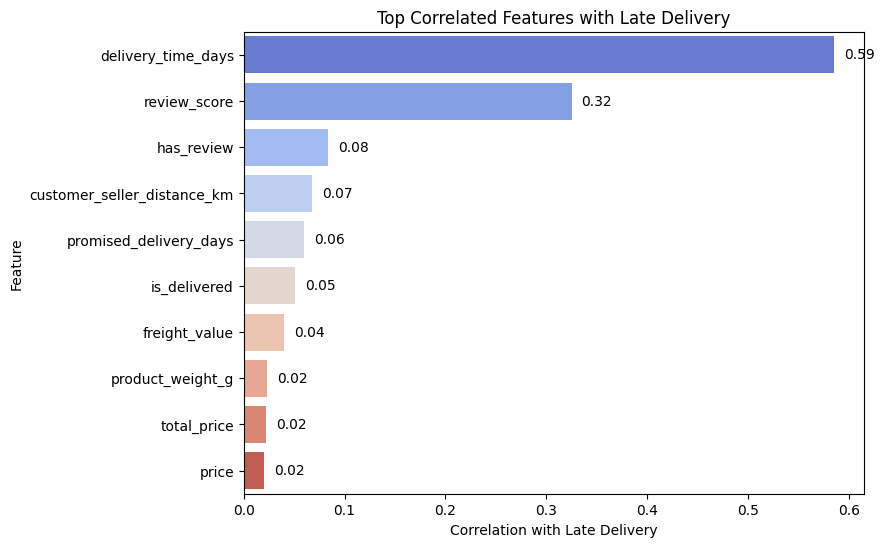

In [26]:
corr = df.corr(numeric_only=True)["delivered_late"].drop(["delivered_late","geolocation_zip_code_prefix_x","customer_zip_code_prefix","is_late","log_distance_seller_customer","seller_zip_code_prefix","geolocation_zip_code_prefix_y"]).abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.index,         # Explicitly assign hue
    palette="coolwarm",
    dodge=False,            # Prevent bar separation
    legend=False            # Suppress legend since hue is just for color
)
for i, v in enumerate(corr.values):
    plt.text(v + 0.01, i, f"{v:.2f}", va="center", fontsize=10, color="black")
plt.xlabel("Correlation with Late Delivery")
plt.ylabel("Feature")
plt.title("Top Correlated Features with Late Delivery")
plt.show()


In [27]:
df = pd.read_csv("../data/processed/olist_model_ready.csv")
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date_x', 'customer_seller_distance_km', 'is_delivered',
       'delivery_time_days', 'is_late', 'shipping_window_days',
       'promised_delivery_days', 'approval_delay_days', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix_x', 'customer_lat', 'customer_lng',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date_y',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'is_category_missing',
       'product_volume_cm3', 'is_large_product', 'seller_zip_code_prefix',
       'seller_c

In [28]:
df["payment_type"]

KeyError: 'payment_type'